## Mini Project 2
    

In [0]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import time

In [0]:
df = pd.read_csv("new_review_file.tsv",delimiter="\t",encoding="utf-8")                  #from review.json
df_star_count = pd.read_csv("final_stars_and_count.tsv",delimiter="\t",encoding="utf-8") #from business.json
print(df.describe())
print(df.info())
print("\n")
print(df_star_count.describe())
print(df_star_count.info())


              stars        useful         funny          cool
count  1.000001e+06  1.000001e+06  1.000001e+06  1.000001e+06
mean   3.725580e+00  1.338025e+00  4.726865e-01  5.621054e-01
std    1.461115e+00  3.466700e+00  2.323942e+00  2.178321e+00
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    5.000000e+00  2.000000e+00  0.000000e+00  0.000000e+00
max    5.000000e+00  6.500000e+02  4.400000e+02  2.680000e+02
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 6 columns):
business_id    1000001 non-null object
stars          1000001 non-null float64
useful         1000001 non-null int64
funny          1000001 non-null int64
cool           1000001 non-null int64
text           1000001 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 45.8+ MB
None


               stars   revie

In [0]:
review_agg = df.groupby('business_id')['useful'].sum()
df_review_agg = pd.DataFrame({'business_id': review_agg.index, 'useful': review_agg.values})

text_agg = df.groupby('business_id')['text'].sum()
df_text_agg = pd.DataFrame({'business_id': text_agg.index, 'text': text_agg.values})

df_star = pd.DataFrame(df_star_count)

df_with_useful = pd.merge(df_review_agg,df_star, on = "business_id")

In [0]:
final_df = pd.merge(df_text_agg,df_with_useful, on = "business_id")

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37619 entries, 0 to 37618
Data columns (total 5 columns):
business_id     37619 non-null object
text            37619 non-null object
useful          37619 non-null int64
stars           37619 non-null float64
review_count    37619 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.7+ MB


In [0]:
data_size = 5000
final_df = final_df.sort_values(['useful','review_count'], ascending = [False,False])
# final_df = final_df.sort_values('review_count', ascending = False)
final_df = final_df.head(data_size)
# print(final_df.describe())
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 8539 to 19119
Data columns (total 5 columns):
business_id     5000 non-null object
text            5000 non-null object
useful          5000 non-null int64
stars           5000 non-null float64
review_count    5000 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 234.4+ KB
None


## #Data Preprocessing
#### Cleaning Text data. Replacing punctuations and digits with None. Converting whole text data to lower case.  

In [0]:
text_data = final_df["text"]
text_data = text_data.apply(lambda x: x.lower())
text_data = text_data.apply(lambda x: x.translate(x.maketrans(" "," ",string.punctuation)))
text_data = text_data.apply(lambda x: x.translate(x.maketrans("","",string.digits)))
text_data = text_data.tolist()
print(text_data[0])

target = final_df["stars"]
total_neighbours = len(set(target.values))
total_neighbours

bim not going to lie  i came here with my girlfriend to see if any drama would ensuenot with us but with other patrons  we also were coming here because it was steps away from the movie theater which we headed to after our dinner  nnwhen we walked in there were  men sitting at a table eating and chatting with sam one of the owners  sam greeted us and said we could sit anywhere we wanted  he also joked that as we were  ladies coming in we could sit with these  gentlemen if we wanted to  we all giggled and my girlfriend and i chose a top a few tables away  nnother than that the restaurant was empty  it is decorated nicely and the pastries in the pastry window looked divine  our server approached us and i couldnt help but notice her uniform shirt saying i speak feline meow  nnwe placed our orders which were taken on an ipad by the server  i ordered amys signature homemade soup of the day  lobster bisque with roasted corn   it was delicious and i gobbled it up  i believe it also had some p

9

In [0]:
review_count = final_df.review_count.head(data_size).values
review_count = np.array(review_count)[:,None]
review_count = normalize(review_count, norm='l1', axis =0)
print(review_count.shape)

(5000, 1)


In [0]:
vectorizer = TfidfVectorizer( stop_words = "english", max_features = 1200, min_df = 50, norm = "l1" ,ngram_range = (1,2))#1200/25
vector = vectorizer.fit_transform(text_data)

print(vectorizer.get_feature_names())


['able', 'absolutely', 'accommodating', 'actual', 'actually', 'add', 'added', 'addition', 'additional', 'affordable', 'afternoon', 'ago', 'ahead', 'air', 'airport', 'amazing', 'ambiance', 'american', 'answer', 'apparently', 'appetizer', 'appetizers', 'apple', 'appointment', 'appreciate', 'area', 'arent', 'arizona', 'arrive', 'arrived', 'asian', 'ask', 'asked', 'asking', 'ate', 'atmosphere', 'attention', 'attentive', 'attitude', 'authentic', 'available', 'average', 'avocado', 'avoid', 'away', 'awesome', 'awful', 'baby', 'bacon', 'bad', 'bag', 'baked', 'bakery', 'bar', 'barely', 'bartender', 'bartenders', 'based', 'basic', 'basically', 'bathroom', 'bbq', 'bean', 'beans', 'beat', 'beautiful', 'bed', 'beef', 'beer', 'beers', 'believe', 'belly', 'best', 'best ive', 'better', 'bi', 'big', 'bigger', 'birthday', 'bit', 'bite', 'black', 'bland', 'blue', 'book', 'booked', 'bottle', 'bought', 'bowl', 'box', 'boy', 'boyfriend', 'bread', 'break', 'breakfast', 'bring', 'brisket', 'broth', 'brought',

In [0]:
new_vector = 1000 * vector
final_features = hstack((new_vector,review_count)).A
print("final_data_shape", final_features.shape)
print(final_features[0])
try:
    pickle.dump(final_features,open("vectorize_joined_features_5k_1200f_50mindf.pickle","wb"))
except Exception as e:
    print("error while dumping data:",e)

final_data_shape (5000, 1201)
[3.87810921e-01 1.99776260e+00 5.78594237e-01 ... 0.00000000e+00
 2.79178630e-01 6.72163801e-04]


In [0]:
final_features = pickle.load(open("vectorize_joined_features_5k_1200f_50mindf.pickle","rb"))

### Linear Regression

In [0]:

x_train, x_test, y_train, y_test = train_test_split(final_features,target, test_size = 0.2, random_state = 24)

print("shape of x_train:",x_train.shape)
print("shape of y_train:", y_train.shape)

shape of x_train: (4000, 1201)
shape of y_train: (4000,)


In [0]:
clf = LinearRegression() # score - 0.63 to 0.70 on applying normalization in vectorization 
start_time = time.time()
classifier = clf.fit(x_train,y_train)
# print("R2 Score on training data: ",clf.score(x_train,y_train))
# print("R2 Score on testing data: ",clf.score(x_test,y_test))
predict = clf.predict(x_test)
y_test_list= y_test.tolist()
predict_list = predict.tolist()
print("Linear Regression")
predict_list = [ round(x,1) for x in predict_list]
print("True values  Predicted values")
for i in range(0,5):
    print(y_test_list[i],"\t\t", predict_list[i])
linear_RMSE = np.sqrt(mean_squared_error(y_test_list, predict_list))
linear_time = time.time() - start_time
print("RMSE:",linear_RMSE)
print("time taken = ",linear_time )

Linear Regression
True values  Predicted values
4.0 		 4.0
5.0 		 4.8
4.0 		 4.0
4.0 		 4.5
3.5 		 3.8
RMSE: 0.3842915559832144
time taken =  1.7717082500457764


In [0]:
lab_encoder = LabelEncoder()
target_encoded = lab_encoder.fit_transform(target.values)

x_train, x_test, y_train, y_test = train_test_split(final_features,target_encoded, test_size = 0.2, random_state = 9)

print("shape of x_train:",x_train.shape)
print("shape of y_train:", y_train.shape)

shape of x_train: (4000, 1201)
shape of y_train: (4000,)


### Different Classification models

In [0]:
import warnings
warnings.filterwarnings(action='ignore')

ml_models = [ KNeighborsClassifier(n_neighbors = total_neighbours), LogisticRegression(),svm.SVC( kernel = 'rbf'),
             svm.SVC( kernel = 'linear'), svm.SVC( kernel = 'poly'),svm.LinearSVC(), MultinomialNB()]
name = [ "KNeighborsClassifier", "LogisticRegression", "svm_RBF","svm_Linear","svm_poly", "svm.LinearSVC","MultinomialNB"]
results = {}
for i,model in enumerate(ml_models):
    start_time = time.time()
    clf = model
    classifier = clf.fit(x_train,y_train)
#   print("\n{}".format(name[i]))
#   print("Score on training data: ",clf.score(x_train,y_train))
#   print("Score on testing data: ",clf.score(x_test,y_test))
    analysis_data = {'Accuracy': str(round(clf.score(x_test,y_test)*100,2))+ " %",
                   'Training time (sec)': (time.time()-start_time)
                    }

    results[name[i]] = analysis_data
    predictions = clf.predict(x_test)
#   print("accuracy:", accuracy_score(y_test,predictions))
    y_test_list= y_test.tolist()
    predict_list = predictions.tolist()

#     print("True values   Predicted values ")
#     for i in range(0,5):
#         print(lab_encoder.inverse_transform(y_test_list[i]),"\t\t" , lab_encoder.inverse_transform(predict_list[i]))
results_of_project_1 = pd.DataFrame(results)
results_of_project_1 

,KNeighborsClassifier,LogisticRegression,svm_RBF,svm_Linear,svm_poly,svm.LinearSVC,MultinomialNB
Accuracy,32.0 %,40.7 %,33.9 %,54.1 %,51.1 %,37.7 %,30.2 %
Training time (sec),9.22209,46.1172,65.4708,26.1852,44.9485,20.9965,0.038307


### Start of Mini_Projet 2

In [0]:
import tensorflow as tf
print("Tensor Flow Version: {}".format(tf.__version__))

Tensor Flow Version: 1.12.0


In [0]:
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)



# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)
    
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [0]:
lab_enc = LabelEncoder()
y_encoded = lab_enc.fit_transform(target)
target_conv = to_categorical(y_encoded)

In [0]:
print(target_conv.shape)
target_conv[:5]

(5000, 9)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(final_features, target_conv, test_size = 0.2, random_state=42)
final_features.shape

(5000, 1201)

In [0]:
model = Sequential()
model.add(Dense(4,input_dim = final_features.shape[1], activation = "relu"))
model.add(Dense(8, activation='relu')) # Hidden 2
model.add(Dense(8, activation='relu')) # Hidden 2
model.add(Dense(target_conv.shape[1], activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta = 1e-3, patience =4, verbose=0, mode = 'auto')
checkpoint = ModelCheckpoint(filepath='best_model.hdf5', monitor='val_loss',save_best_only=True)

start = time.time()
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), 
          batch_size = 32,callbacks=[monitor,checkpoint],
          verbose=0,epochs=100)
print("Time to train:", time.time() - start)
model.load_weights("best_model.hdf5")

Time to train: 31.745525121688843


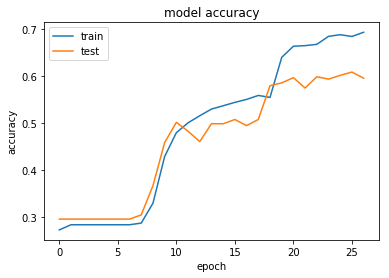

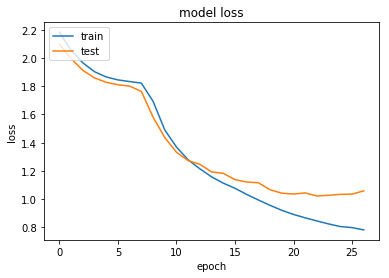

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Classification models

In [0]:
true_classes = np.argmax(y_test,axis=1)
total_activation = ["relu", "sigmoid","tanh"]
optimizers = ["adam","sgd"]

result = {}

for i in total_activation:
    for j in optimizers:
        model = Sequential()
        
        model.add(Dense(4,input_dim = final_features.shape[1], activation = i))
        model.add(Dense(8, activation=i)) # Hidden 2
#         model.add(Dense(8, activation=i)) # Hidden 3
        model.add(Dense(target_conv.shape[1], activation='softmax')) # Output
        
        model.compile(loss='categorical_crossentropy', optimizer=j, metrics = ['accuracy'])
        
        monitor = EarlyStopping(monitor='val_loss', min_delta = 1e-3, patience = 4, verbose=0, mode = 'auto')
        
        checkpoint = ModelCheckpoint(filepath='best_model.hdf5', monitor='val_loss', save_best_only=True)
        start = time.time()
        
        history = model.fit(x_train, y_train, validation_data= (x_test, y_test), 
          batch_size = 32,callbacks=[monitor,checkpoint],
          verbose=0,epochs=100)
        pred = model.predict(x_test)
        predict_classes = np.argmax(pred,axis=1)
        
#         print("Predictions for model:")
#         for k in range(5):
#             print(lab_enc.inverse_transform(true_classes[k]),"\t\t",lab_enc.inverse_transform(predict_classes[k]))
        accuracy = accuracy_score(true_classes,predict_classes)
        data = {
            "Accuracy" : accuracy*100,
            "Activation" : i,
            "Optimizer" : j,
            "Train time(sec):" : (time.time() - start)
        }
        result[i+ ' '+j] = data
result_of_project_2 = pd.DataFrame(result)

In [0]:
result_of_project_2

,relu adam,relu sgd,sigmoid adam,sigmoid sgd,tanh adam,tanh sgd
Accuracy,61.6,46.1,51.9,47.5,54.3,48.4
Activation,relu,relu,sigmoid,sigmoid,tanh,tanh
Optimizer,adam,sgd,adam,sgd,adam,sgd
Train time(sec):,26.8329,31.5323,31.5159,79.9576,23.1352,28.5601


In [0]:
results_of_project_1

,KNeighborsClassifier,LogisticRegression,svm_RBF,svm_Linear,svm_poly,svm.LinearSVC,MultinomialNB
Accuracy,32.0 %,40.7 %,33.9 %,54.1 %,51.1 %,37.7 %,30.2 %
Training time (sec),9.22209,46.1172,65.4708,26.1852,44.9485,20.9965,0.038307


### Regression Model 

In [0]:
target.head(5)

8539     3.0
20091    4.0
34479    3.5
12460    3.5
14054    4.0
Name: stars, dtype: float64

In [0]:
x_train, x_test, y_train, y_test = train_test_split(final_features, target
                                                    , test_size = 0.2, random_state=42)
final_features.shape[1]

1201

### NN  Regression

In [0]:
model = Sequential()
model.add(Dense(30,input_dim = final_features.shape[1], activation = "relu"))
model.add(Dense(8, activation='relu'))#Hidden
model.add(Dense(1)) # Output

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta = 1e-3, patience =2, verbose=0, mode = 'auto')

checkpoint = ModelCheckpoint(filepath='best_model.hdf5', monitor='val_loss', save_best_only=True)

start_time = time.time()
history = model.fit(x_train, y_train, validation_data= (x_test, y_test), callbacks=[monitor], verbose=0,epochs=500)

In [0]:
pred = model.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(pred,y_test)))
print("time taken = ", time.time() - start_time)

RMSE: 0.32940201409061315
time taken =  13.919573545455933


In [0]:
print("For Linear Regression")
print("RMSE:",linear_RMSE)
print("time to train:",linear_time)

For Linear Regression
RMSE: 0.3842915559832144
time to train: 1.7717082500457764


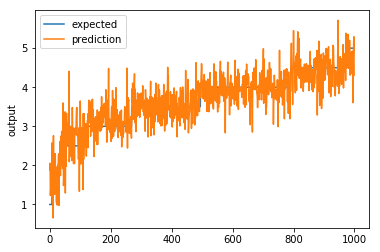

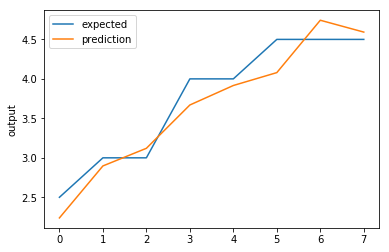

In [0]:
chart_regression(pred.flatten(),y_test)
chart_regression(pred[:8].flatten(),y_test[:8])